In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('US_Accidents_May19.csv')

In [5]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

In [7]:
print(df['Country'].unique())

['US']


In [8]:
print(df['State'].unique())

['OH' 'WV' 'CA' 'FL' 'GA' 'SC' 'NE' 'IA' 'IL' 'MO' 'WI' 'IN' 'MI' 'NJ'
 'NY' 'CT' 'MA' 'RI' 'NH' 'PA' 'KY' 'MD' 'VA' 'DC' 'DE' 'TX' 'WA' 'OR'
 'AL' 'TN' 'NC' 'MN' 'KS' 'OK' 'LA' 'CO' 'UT' 'AZ' 'NM' 'NV' 'VT' 'MS'
 'AR' 'MT' 'ME' 'ND' 'WY' 'ID' 'SD']


In [9]:
df.isna().sum()

ID                             0
Source                         0
TMC                       516762
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1727177
End_Lng                  1727177
Distance(mi)                   0
Description                    1
Number                   1458402
Street                         0
Side                           0
City                          68
County                         0
State                          0
Zipcode                      646
Country                        0
Timezone                    2141
Airport_Code               23664
Weather_Timestamp          47170
Temperature(F)             62265
Wind_Chill(F)            1852370
Humidity(%)                64467
Pressure(in)               57280
Visibility(mi)             71360
Wind_Direction             47190
Wind_Speed(mph)           442954
Precipitat

In [10]:
working_ds = df.drop(['End_Lat','End_Lng','Description','Airport_Code','Weather_Timestamp','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction','Wind_Speed(mph)','Precipitation(in)','Weather_Condition'],axis=1)

In [11]:
state_most_acci = working_ds.groupby('State')['ID'].count().reset_index()

In [12]:
state_most_acci = state_most_acci.sort_values(ascending=False,by='ID')

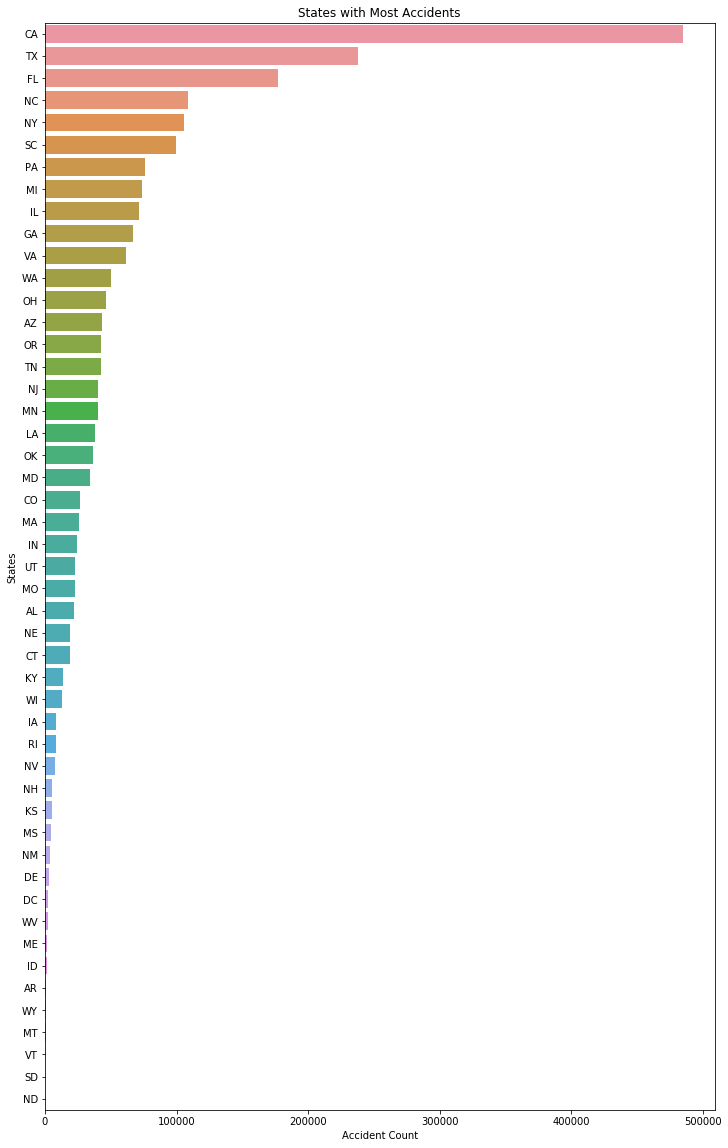

In [13]:
plt.figure(figsize=(12,20))
sns.barplot(data=state_most_acci,x='ID',y='State')
plt.title('States with Most Accidents')
plt.xlabel('Accident Count')
plt.ylabel('States')
plt.savefig('US-Accidents-Stats.jpeg')

In [14]:
state_most_acci.head()

,State,ID
3,CA,484706
41,TX,237637
8,FL,177490
25,NC,108916
32,NY,105523


In [15]:
working_ds_ca = working_ds[working_ds.State == 'CA']

In [16]:
working_ds_ca.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Number,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
728,A-729,MapQuest,201.0,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,0.0,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
729,A-730,MapQuest,201.0,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,0.0,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
730,A-731,MapQuest,201.0,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,0.0,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
731,A-732,MapQuest,201.0,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,0.0,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
732,A-733,MapQuest,201.0,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,0.0,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


In [17]:
working_ds_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484706 entries, 728 to 2243938
Data columns (total 35 columns):
ID                       484706 non-null object
Source                   484706 non-null object
TMC                      372356 non-null float64
Severity                 484706 non-null int64
Start_Time               484706 non-null object
End_Time                 484706 non-null object
Start_Lat                484706 non-null float64
Start_Lng                484706 non-null float64
Distance(mi)             484706 non-null float64
Number                   98821 non-null float64
Street                   484706 non-null object
Side                     484706 non-null object
City                     484702 non-null object
County                   484706 non-null object
State                    484706 non-null object
Zipcode                  484588 non-null object
Country                  484706 non-null object
Timezone                 484588 non-null object
Amenity            

In [ ]:
working_ds_ca['Start_Time'] = pd.to_datetime(working_ds_ca['Start_Time'])

In [ ]:
working_ds_ca['End_Time'] = pd.to_datetime(working_ds_ca['End_Time'])

In [ ]:
working_ds_ca['accident_hour'] = working_ds_ca.Start_Time.dt.hour
working_ds_ca['accident_day'] = working_ds_ca.Start_Time.dt.day
working_ds_ca['accident_month'] = working_ds_ca.Start_Time.dt.month
working_ds_ca['accident_year'] = working_ds_ca.Start_Time.dt.year

In [21]:
working_ds_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484706 entries, 728 to 2243938
Data columns (total 39 columns):
ID                       484706 non-null object
Source                   484706 non-null object
TMC                      372356 non-null float64
Severity                 484706 non-null int64
Start_Time               484706 non-null datetime64[ns]
End_Time                 484706 non-null datetime64[ns]
Start_Lat                484706 non-null float64
Start_Lng                484706 non-null float64
Distance(mi)             484706 non-null float64
Number                   98821 non-null float64
Street                   484706 non-null object
Side                     484706 non-null object
City                     484702 non-null object
County                   484706 non-null object
State                    484706 non-null object
Zipcode                  484588 non-null object
Country                  484706 non-null object
Timezone                 484588 non-null object
Ame

In [22]:
working_ds_ca.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Number,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,accident_hour,accident_day,accident_month,accident_year
728,A-729,MapQuest,201.0,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,0.0,NaN,...,False,False,Day,Day,Day,Day,10,21,6,2016
729,A-730,MapQuest,201.0,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,0.0,NaN,...,False,False,Day,Day,Day,Day,10,21,6,2016
730,A-731,MapQuest,201.0,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,0.0,NaN,...,False,False,Day,Day,Day,Day,10,21,6,2016
731,A-732,MapQuest,201.0,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,0.0,NaN,...,False,False,Day,Day,Day,Day,10,21,6,2016
732,A-733,MapQuest,201.0,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,0.0,NaN,...,False,False,Day,Day,Day,Day,10,21,6,2016


In [23]:
hour_most_acci = working_ds_ca.groupby('accident_hour')['ID'].count().reset_index()
day_most_acci = working_ds_ca.groupby('accident_day')['ID'].count().reset_index()
month_most_acci = working_ds_ca.groupby('accident_month')['ID'].count().reset_index()
year_most_acci = working_ds_ca.groupby('accident_year')['ID'].count().reset_index()

In [24]:
hour_most_acci.sort_values(by='accident_hour')
day_most_acci.sort_values(by='accident_day')
month_most_acci.sort_values(by='accident_month')
year_most_acci.sort_values(by='accident_year')

,accident_year,ID
0,2016,140456
1,2017,152668
2,2018,156785
3,2019,34797


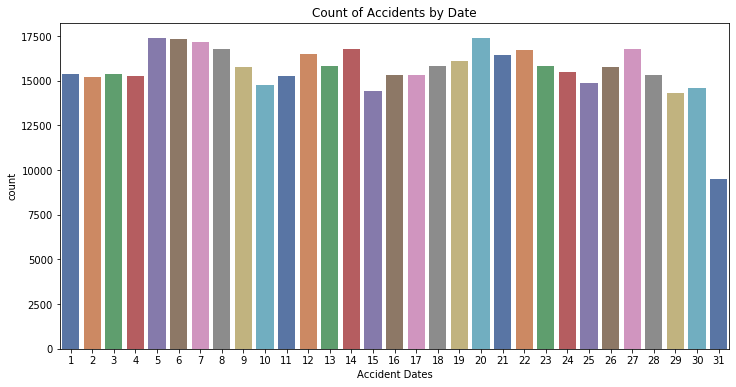

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data=working_ds_ca,x='accident_day',palette='deep')
plt.xlabel('Accident Dates')
plt.title('Count of Accidents by Date')
plt.savefig('US-Accidents-Stats-byDate.jpeg')

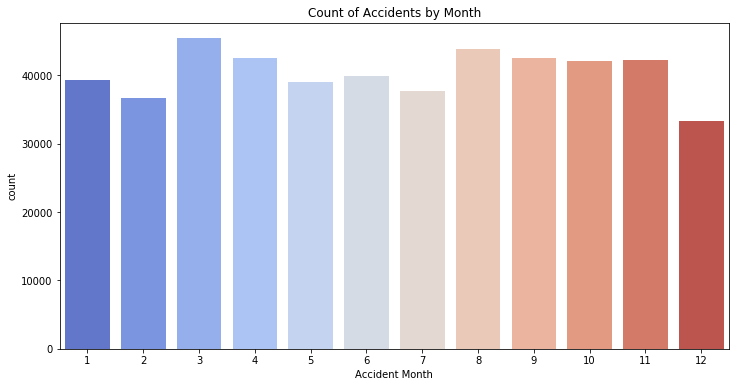

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data=working_ds_ca,x='accident_month',palette='coolwarm')
plt.xlabel('Accident Month')
plt.title('Count of Accidents by Month')
plt.savefig('US-Accidents-Stats-byMonth.jpeg')

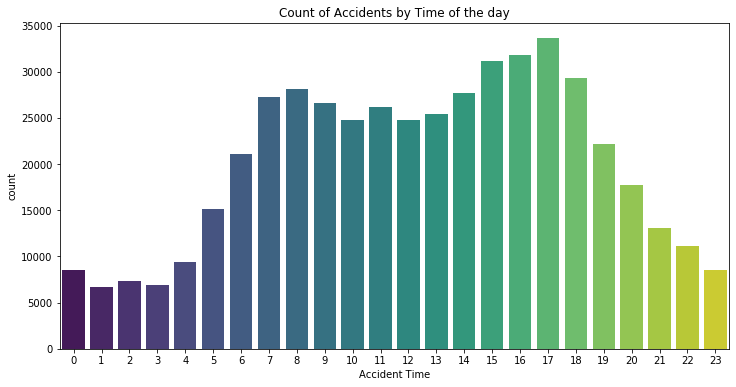

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(data=working_ds_ca,x='accident_hour',palette='viridis')
plt.xlabel('Accident Time')
plt.title('Count of Accidents by Time of the day')
plt.savefig('US-Accidents-Stats-byMonth.jpeg')

Text(0, 0.5, 'Names of City')

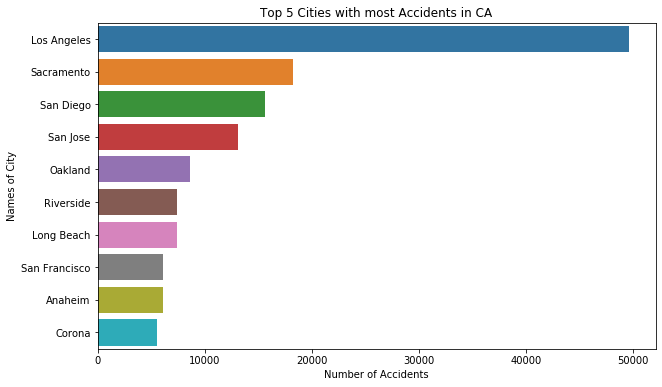

In [28]:
#Top 5 Cities in California with most accidents in US
ca_city_accidents = working_ds_ca.groupby('City')['ID'].count().reset_index().sort_values(ascending=False,by='ID').head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=ca_city_accidents,y='City',x='ID')
plt.title('Top 5 Cities with most Accidents in CA')
plt.xlabel('Number of Accidents')
plt.ylabel('Names of City')

In [29]:
working_ds_la = working_ds_ca[working_ds_ca['City']=='Los Angeles']

In [30]:
working_ds_la.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Number,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,accident_hour,accident_day,accident_month,accident_year
42866,A-42867,MapQuest,201.0,2,2016-06-21 10:46:30,2016-06-21 11:27:00,34.078926,-118.289040,0.0,NaN,...,False,False,Day,Day,Day,Day,10,21,6,2016
42867,A-42868,MapQuest,201.0,3,2016-06-21 10:49:21,2016-06-21 11:34:21,34.091179,-118.239471,0.0,NaN,...,False,False,Day,Day,Day,Day,10,21,6,2016
42881,A-42882,MapQuest,201.0,3,2016-06-21 10:51:45,2016-06-21 11:36:45,34.037239,-118.309074,0.0,NaN,...,False,False,Day,Day,Day,Day,10,21,6,2016
42883,A-42884,MapQuest,201.0,3,2016-06-21 10:56:24,2016-06-21 11:34:00,34.027458,-118.274490,0.0,NaN,...,False,False,Day,Day,Day,Day,10,21,6,2016
42898,A-42899,MapQuest,201.0,3,2016-06-21 11:30:46,2016-06-21 12:00:46,33.947544,-118.279434,0.0,NaN,...,False,False,Day,Day,Day,Day,11,21,6,2016


In [31]:
#Top 5 Streets with most accidents in LA
ca_la_street_accidents = working_ds_la.groupby('Street')['ID'].count().reset_index().sort_values(ascending=False,by='ID').head(10)

Text(0, 0.5, 'Names of Streets of LA')

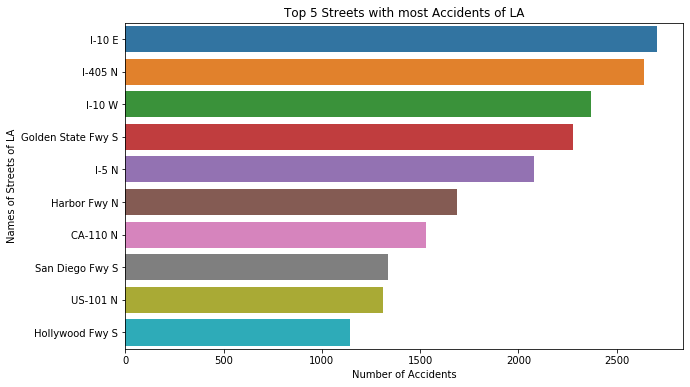

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(data=ca_la_street_accidents,y='Street',x='ID')
plt.title('Top 5 Streets with most Accidents of LA')
plt.xlabel('Number of Accidents')
plt.ylabel('Names of Streets of LA')